This program will use the Gaussian kernel to classify the MNIST data set.

In [ ]:
#Importing the MNIST data set
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
x, y = mnist["data"], mnist["target"] #Creating arrays for the feature vectors and the labels

37036


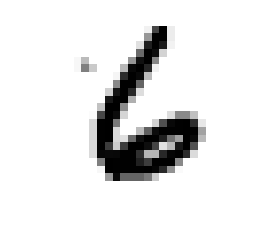

6.0

In [3]:
#Importing matplotlib to display the handwritten digits that will be classified
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random

#Selecting a random image from the data set
images = x.shape[0]
index = random.randrange(images)
print(index)

#Reshaping the array to a 28x28 pixel image
display = x[index].reshape((28,28))

#Plotting the image
plt.imshow(display, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
y[index]

In [4]:
#Splitting the data into training cases and test cases
xtrain, ytrain, xtest, ytest = x[:60000], y[:60000], x[60000:], y[60000:]

In [26]:
#Counting the amount each class occurs in the training cases (to be used in normalizing the Gaussian distance)
train_counter = [0]*10

for n in range(len(ytrain)):
    train_counter[int(ytrain[n])] += 1 
    
for n in range(len(train_counter)):
    print(str(n) + ": " + str(train_counter[n]))

0: 5923
1: 6742
2: 5958
3: 6131
4: 5842
5: 5421
6: 5918
7: 6265
8: 5851
9: 5949


In [6]:
#Defining the Gaussian kernel using a function for the Euclidean distance
import numpy as np
import math

def euclid(a,b,h):
    argument = (a-b)/h
    magnitude = np.linalg.norm(argument) #Changes the Euclidean distance from a vector value with 784 dimensions to a scalar
    return magnitude

def gaussian(a,b,h):
    gauss = math.exp(-(euclid(a,b,h))**2)
    return gauss

In [31]:
#Taking input for a smoothing factor to be used in the Gaussian kernel
h = float(input("Please enter a value for the smoothing factor h (suggested default: 1000): "))
while h <= 0:
    h = float(input("Please enter a valid positive nonzero value for h: "))

#Computation and normalization of the 10 Gaussian kernels
def classifier(new_case):
    gdist = [0]*10
    ndist = [0]*10
    for n in range(len(xtrain)): 
        gdist[int(ytrain[n])] += gaussian(new_case,xtrain[n],h)
        ndist[int(ytrain[n])] = gdist[int(ytrain[n])]/train_counter[int(ytrain[n])]
    decision = np.argmax(ndist) #Decision is made on which of the 10 functions has the highest value
    return decision

Please enter a value for the smoothing factor h (suggested default: 1000): 1000


In [49]:
#Randomizing the array of test cases and selecting 256 for classification by the kernel
samples = 256
randomize = np.arange(len(xtest))
np.random.shuffle(randomize)
xtest = xtest[randomize]
ytest = ytest[randomize]
confusion = np.zeros([10,10],dtype = int)

#Implementing the classification function and filling the confusion matrix
for n in range(samples):
    c = classifier(xtest[n])
    confusion[int(ytest[n])][c] += 1
    
print(confusion)

[[25  0  0  0  0  0  1  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0 12 16  0  0  0  2  1  2  0]
 [ 0  8  0 20  0  0  0  0  1  1]
 [ 1  5  0  0  9  0  0  0  0  4]
 [ 6 14  0  5  0  3  0  0  2  0]
 [ 1  2  0  0  0  0 25  0  0  0]
 [ 0  5  1  0  0  0  0 22  0  0]
 [ 1  5  0  2  0  0  0  0  7  1]
 [ 0  4  0  0  0  0  0  1  1 14]]


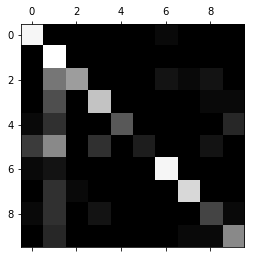

In [50]:
#Plotting the non-normalized confusion matrix
plt.matshow(confusion, cmap=plt.cm.gray)
plt.show()

In [54]:
#Normalizing the confusion matrix using percentages
rowtotals = confusion.sum(axis = 1)
norm_confusion = confusion.astype(float)

for n in range(len(confusion)):
    norm_confusion[n] = norm_confusion[n]/rowtotals[n]
    
print(norm_confusion)    

[[ 0.03698225  0.          0.          0.          0.          0.
   0.00147929  0.          0.          0.        ]
 [ 0.          0.03846154  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.01101928  0.01469238  0.          0.          0.
   0.00183655  0.00091827  0.00183655  0.        ]
 [ 0.          0.00888889  0.          0.02222222  0.          0.          0.
   0.          0.00111111  0.00111111]
 [ 0.00277008  0.01385042  0.          0.          0.02493075  0.          0.
   0.          0.          0.01108033]
 [ 0.00666667  0.01555556  0.          0.00555556  0.          0.00333333
   0.          0.          0.00222222  0.        ]
 [ 0.00127551  0.00255102  0.          0.          0.          0.
   0.03188776  0.          0.          0.        ]
 [ 0.          0.00637755  0.00127551  0.          0.          0.          0.
   0.02806122  0.          0.        ]
 [ 0.00390625  0.01953125  0.          0.0078125   0.   

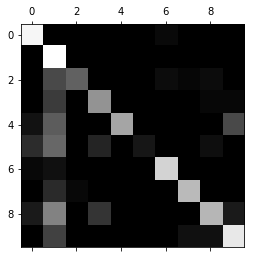

In [55]:
#Plotting the normalized confusion matrix
plt.matshow(norm_confusion, cmap=plt.cm.gray)
plt.show()